# Read ME  
##  Adam Shirley  
## bsa919adam@gmail.com  
## CPSC 438 Project2  

### This project looks at and examines realestate data from Boston and tries to create a model for the median home value

### Experiment 1 and 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("boston.npz")

target = data['target']
test_target = target[102:]
valid_target = target[:102]

validation = data['features'][:102]
test = data['features'][102:]


### Experiment 3

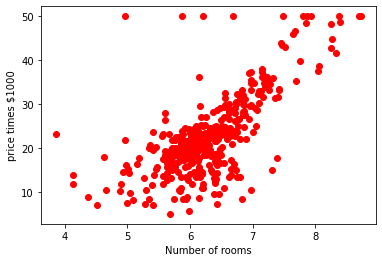

In [2]:
plt.plot(test[:,5], test_target, 'ro')
plt.xlabel("Number of rooms")
plt.ylabel("price times $1000")
plt.show()

The relationship does seems to be somewhat linear

### Experiment 4

In [3]:
x = test[:,5]
t = test_target

numeratorw1 = np.average(x*t) - np.average(x)*np.average(t)
denominatorw1 = np.average(np.square(x)) - np.average(x)**2

w1 = numeratorw1/denominatorw1
w0 = np.average(t) - w1*np.average(x)

print("w1 = ", w1)
print("w0 = ", w0)


w1 =  9.03591206114657
w0 =  -34.127314809180376


The equation is t = -34.13 + 9.036x


### Experiment 5

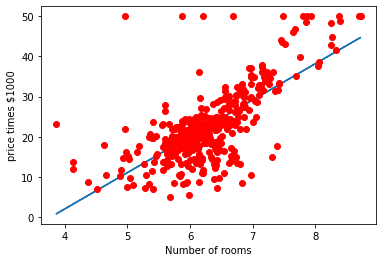

In [4]:
plt.plot(x, w0 + w1 * x)
plt.plot(test[:,5], test_target, 'ro')
#plt.axis([3.5, 10, 0, 40])
plt.xlabel("Number of rooms")
plt.ylabel("price times $1000")
plt.show()

The model appears to fit the data ok but not super great

### Experiment 6

In [5]:
predicted = w0 + w1 * x

avgLoss = np.average(np.square(test_target - predicted))  

print('averge Squared Loss =', avgLoss )

averge Squared Loss = 41.05654883138217


### Experiment 7

In [6]:
predicted_valid = w0 + w1 * validation[:,5]

avgLoss_valid = np.average(np.square(valid_target - predicted_valid))  

print('averge Squared Loss =', avgLoss_valid )

averge Squared Loss = 53.767877955423295


The difference comes from the fact that the model is trained on the training set as such it will predict the training set much more accuratley than the validation

### Experiment 8

In [7]:
X = test
bias = np.ones((404, 1))
X= np.concatenate((bias, X),axis = 1)
t = test_target

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X )), np.transpose(X)), t) 
print("w = ", w)


w =  [ 3.19642409e+01 -1.14552861e-01  4.48932130e-02  2.83755698e-02
  2.70909742e+00 -1.67403672e+01  4.11148209e+00 -8.47905081e-04
 -1.38493905e+00  3.21084569e-01 -1.22497115e-02 -9.12523500e-01
  1.02533638e-02 -4.78414631e-01]


In [8]:
predicted_m = np.matmul(X, w)

avgLoss_m = np.matmul(np.transpose(t - predicted_m), t- predicted_m)/predicted_m.shape[0]

print("Training set avg loss = ", avgLoss_m )

Training set avg loss =  21.807199582316606


In [9]:
Xvalid = validation
bias = np.ones((validation.shape[0], 1))
Xvalid= np.concatenate((bias, Xvalid),axis = 1)
tvalid = valid_target

predicted_mvalid = np.matmul(Xvalid, w)

avgLoss_mvalid = np.matmul(np.transpose(tvalid - predicted_mvalid), tvalid- predicted_mvalid)/predicted_mvalid.shape[0]

print("Validation set avg loss = ", avgLoss_mvalid )

Validation set avg loss =  22.863680896365505


The values are much more accurate due to the inclussion of more variables allowing for the model to better fit the expected results

### Experiment 9
The following are the values represented in the data set in order  
 CRIM     per capita crime rate by town   
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.   
 INDUS    proportion of non-retail business acres per town  
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
 NOX      nitric oxides concentration (parts per 10 million)  
 RM       average number of rooms per dwelling  
 AGE      proportion of owner-occupied units built prior to 1940  
 DIS      weighted distances to five Boston employment centres  
 RAD      index of accessibility to radial highways  
 TAX      full-value property-tax rate per $10,000 
 
 PTRATIO  pupil-teacher ratio by town    
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town     
 LSTAT    % lower status of the population    
 MEDV     Median value of owner-occupied homes in $1000's     
 
 The Median home value will be affected by the following amounts when the values above chnge one unit 

In [10]:
print("Crim = ","${:,.2f}".format(w[1]*1000))
print("ZN = ", "${:,.2f}".format(w[2]*1000))
print('Indus = ', "${:,.2f}".format(w[3]*1000))
print('CHAS = ',"${:,.2f}".format(w[4]*1000))
print('Nox = ',"${:,.2f}".format(w[5]*1000))
print('RM = ', "${:,.2f}".format(w[6]*1000))
print('AGE = ', "${:,.2f}".format(w[7]*1000))
print('DIS = ', "${:,.2f}".format(w[8]*1000))
print('RAD = ', "${:,.2f}".format(w[9]*1000))
print('TAX = ', "${:,.2f}".format(w[10]*1000))
print('PTRATIO = ', "${:,.2f}".format(w[11]*1000))
print('B  = ', "${:,.2f}".format(w[12]*1000))
print('LSTAT = ', "${:,.2f}".format(w[13]*1000))

Crim =  $-114.55
ZN =  $44.89
Indus =  $28.38
CHAS =  $2,709.10
Nox =  $-16,740.37
RM =  $4,111.48
AGE =  $-0.85
DIS =  $-1,384.94
RAD =  $321.08
TAX =  $-12.25
PTRATIO =  $-912.52
B  =  $10.25
LSTAT =  $-478.41


### Experiment 10
The most important features are the Crime rate, The location being on the Charles river, the number of rooms, and the distance to the differnt employment centers.
The other value that seems relevant is the Nitric oxides concentration but this has a very small range through the set as well as the fact it changes by tenths more than 1 which makes it still relevant but not as much as it seems